In [69]:
import sys
sys.path.insert(0,'..')
from src.data.create_stochastic_block_model import create_louvain_communities_dict,store_in_file,create_graph_and_node_mappings_from_file
from src.data.data_loader import GraphDataset
from torch_geometric.utils import to_networkx
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
def detect_and_store_communities(graph_path, ouput_path):
    graph, node_mappings, reverse_node_mappings = create_graph_and_node_mappings_from_file(graph_path)
    node_communities_louvain = create_louvain_communities_dict(graph, reverse_node_mappings)
    store_in_file(node_communities_louvain, ouput_path)

In [16]:
datasets = datasets = 'cora citeseer pubmed cora_full'.split()

In [17]:
for dataset in datasets:
    i = 0
    detect_and_store_communities(f'../data/graphs/confmodel/{dataset}/{dataset}_confmodel_{i}.cites',f'../data/community_id_dicts/confmodel/{dataset}-conf{i}')
#     data = GraphDataset(f'../data/tmp/{dataset}_directed-confmodel{i}', dataset,
#                        f'../data/graphs/confmodel/{dataset}/{dataset}_confmodel_{i}.cites',
#                        f'../data/graphs/processed/{dataset}/{dataset}.content',
#                        directed=True, reverse=False)[0]
#     G = to_networkx(data)

In [24]:
from src.data.create_stochastic_block_model import calculate_edge_probabilities,create_community_id_to_node_id

In [64]:
def load_labels(path):
    label = {}
    cnt = 0
    label_mapping = {}
    reverse_label_mapping = {}
    with open(path, 'r') as handle:
        label = {}
        for line in handle:
            s = line.strip().split()
            if s[-1] not in label_mapping:
                label_mapping[s[-1]] = cnt
                reverse_label_mapping[cnt] = s[-1]
                cnt+=1
            label[s[0]] = label_mapping[s[-1]]
    return label,reverse_label_mapping

def label_stochastic_matric(graph_path, content_path):
    graph, node_mappings, reverse_node_mappings = create_graph_and_node_mappings_from_file(graph_path)
    labels,remap = load_labels(content_path)
    node_labels = {}
    for node in labels:
        node_labels[node_mappings[node]] = labels[node]
    label_id_to_node_id = create_community_id_to_node_id(node_labels)
    edge_probabilities = calculate_edge_probabilities(graph, label_id_to_node_id,
                                                      node_labels, None)
    return edge_probabilities

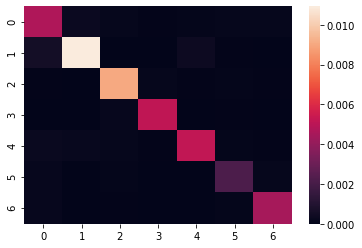

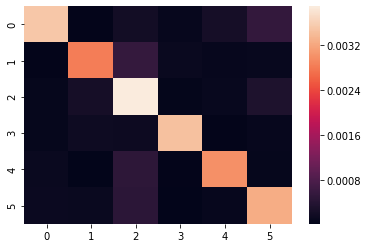

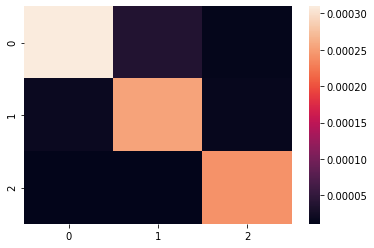

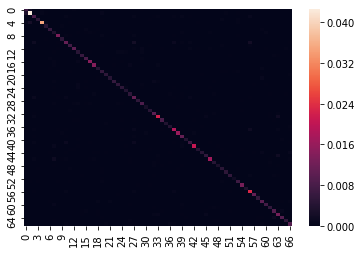

In [72]:
for dataset_name in datasets:
    mtx = label_stochastic_matric(f'../data/graphs/processed/{dataset_name}/{dataset_name}.cites',
                       f'../data/graphs/processed/{dataset_name}/{dataset_name}.content')
    plt.figure()
    sns.heatmap(mtx)
